In [217]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy import stats
from matplotlib import mlab
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [218]:
estimate_from_mobile_data = np.load('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_from_mobile_data.npy')
estimate_month7_Geo = np.load('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_month7_Geo.npy')

In [219]:
print('平均値：', np.mean(estimate_from_mobile_data))
print('中央値：', np.median(estimate_from_mobile_data))
print('合計：', np.sum(estimate_from_mobile_data))
print('分散：',np.var(estimate_from_mobile_data,ddof=1))
print('標準偏差：',np.std(estimate_from_mobile_data,ddof=1))
print('最大：',np.max(estimate_from_mobile_data))
print('最小：',np.min(estimate_from_mobile_data))
print('歪度：',stats.skew(estimate_from_mobile_data))
print('尖度：',stats.kurtosis(estimate_from_mobile_data))
print('四分位点(25%)：', np.percentile(estimate_from_mobile_data, 25))
print('四分位点(50%)：', np.percentile(estimate_from_mobile_data, 50))
print('四分位点(75%)：', np.percentile(estimate_from_mobile_data, 75))
print('最頻値：', stats.mode(estimate_from_mobile_data))

平均値： 1954314.055107527
中央値： 1830380.5
合計： 1454009657
分散： 97611131830.42628
標準偏差： 312427.8025887362
最大： 2547273
最小： 1634943
歪度： [-0.57390801 -0.92635113 -1.20908639 -1.33072758 -1.27778999 -1.31075517
 -0.85578965 -0.62671297 -0.59443581 -0.58647437 -0.59017031 -0.5892766
 -0.59196104 -0.59162219 -0.59235053 -0.58837194 -0.58734766 -0.58140745
 -0.56608571 -0.50616894 -0.37538156 -0.160805    0.10673608  0.1836832 ]
尖度： [ 0.1730611   0.40636754  1.16840807  1.61619622  1.27362914  1.23521963
 -0.7764167  -1.48286581 -1.57841704 -1.58608654 -1.57628169 -1.56830575
 -1.55694594 -1.55446388 -1.55110622 -1.55292603 -1.55132676 -1.5430241
 -1.52236366 -1.45534136 -1.34324578 -1.11803543 -0.66436843 -0.3494571 ]
四分位点(25%)： 1680293.25
四分位点(50%)： 1830380.5
四分位点(75%)： 2270993.25
最頻値： ModeResult(mode=array([[1641603, 1637178, 1635961, 1634943, 1636421, 1639663, 1649279,
        1665001, 1687424, 1713990, 1748692, 1783673, 1811080, 1825855,
        1833614, 1834363, 1826720, 1811907, 1782724, 1759

In [220]:
print('平均値：', np.mean(estimate_month7_Geo))
print('中央値：', np.median(estimate_month7_Geo))
print('合計：', np.sum(estimate_month7_Geo))
print('分散：',np.var(estimate_month7_Geo,ddof=1))
print('標準偏差：',np.std(estimate_month7_Geo,ddof=1))
print('最大：',np.max(estimate_month7_Geo))
print('最小：',np.min(estimate_month7_Geo))
print('歪度：',stats.skew(estimate_month7_Geo))
print('尖度：',stats.kurtosis(estimate_month7_Geo))
print('四分位点(25%)：', np.percentile(estimate_month7_Geo, 25))
print('四分位点(50%)：', np.percentile(estimate_month7_Geo, 50))
print('四分位点(75%)：', np.percentile(estimate_month7_Geo, 75))
print('最頻値：', stats.mode(estimate_month7_Geo))

平均値： 2665.1259857876025
中央値： 2640.0
合計： 1982853.7334259762
分散： 1931749.3234581174
標準偏差： 1389.873851634787
最大： 8571.42857142857
最小： 258.8235294117647
歪度： [0.81931257 0.55304044 0.39286767 0.51923841 0.43132543 0.47117438
 0.14372071 0.18901708 0.60521973 0.89137376 0.69328095 0.3787913
 0.70484234 0.95186261 0.65037574 0.96030545 1.15161817 0.7931171
 0.46290677 0.29719738 0.87867915 0.4006545  4.39103716 0.1015452 ]
尖度： [ 3.17885044e-01 -7.73183767e-01 -6.48336350e-01 -1.41012651e-02
 -1.68131420e-01 -1.71898685e-01 -7.62337434e-01 -1.10693319e+00
  7.62825288e-02  2.11430829e-02 -8.68527365e-01 -1.25876946e+00
  6.34364412e-02 -1.25990004e-01 -1.04906985e+00  2.35924598e-01
  3.55605450e-01 -1.04283989e-01 -2.00698706e-01  9.89659428e-02
  3.42632817e-01 -7.67348497e-01  1.99699534e+01  4.32345730e-01]
四分位点(25%)： 1695.9759932674847
四分位点(50%)： 2640.0
四分位点(75%)： 3723.670212765958
最頻値： ModeResult(mode=array([[ 942.85714286,  577.47440273,  366.598778  ,  258.82352941,
         587.275693

In [221]:
def min_max(x, axis=None):
    x_min = x.min(axis=axis, keepdims=True)
    x_max = x.max(axis=axis, keepdims=True)
    return (x - x_min) / (x_max - x_min)

In [222]:
#estimate_month7_Geo[27,22] = estimate_month7_Geo[27,21]

In [223]:
# normalization_estimate_from_mobile_data = stats.zscore(estimate_from_mobile_data)
# normalization_estimate_month7_Geo = stats.zscore(estimate_month7_Geo)

In [224]:
normalization_estimate_from_mobile_data = min_max(estimate_from_mobile_data)
normalization_estimate_month7_Geo = min_max(estimate_month7_Geo)

In [225]:
print('平均値：', np.mean(normalization_estimate_from_mobile_data))
print('中央値：', np.median(normalization_estimate_from_mobile_data))
print('合計：', np.sum(normalization_estimate_from_mobile_data))
print('分散：',np.var(normalization_estimate_from_mobile_data,ddof=1))
print('標準偏差：',np.std(normalization_estimate_from_mobile_data,ddof=1))
print('最大：',np.max(normalization_estimate_from_mobile_data))
print('最小：',np.min(normalization_estimate_from_mobile_data))
print('歪度：',stats.skew(normalization_estimate_from_mobile_data))
print('尖度：',stats.kurtosis(normalization_estimate_from_mobile_data))
print('四分位点(25%)：', np.percentile(normalization_estimate_from_mobile_data, 25))
print('四分位点(50%)：', np.percentile(normalization_estimate_from_mobile_data, 50))
print('四分位点(75%)：', np.percentile(normalization_estimate_from_mobile_data, 75))
print('最頻値：', stats.mode(normalization_estimate_from_mobile_data))

平均値： 0.3500608936541897
中央値： 0.21421799129700875
合計： 260.44530487871714
分散： 0.11727229834859165
標準偏差： 0.34245043195854147
最大： 1.0
最小： 0.0
歪度： [-0.57390801 -0.92635113 -1.20908639 -1.33072758 -1.27778999 -1.31075517
 -0.85578965 -0.62671297 -0.59443581 -0.58647437 -0.59017031 -0.5892766
 -0.59196104 -0.59162219 -0.59235053 -0.58837194 -0.58734766 -0.58140745
 -0.56608571 -0.50616894 -0.37538156 -0.160805    0.10673608  0.1836832 ]
尖度： [ 0.1730611   0.40636754  1.16840807  1.61619622  1.27362914  1.23521963
 -0.7764167  -1.48286581 -1.57841704 -1.58608654 -1.57628169 -1.56830575
 -1.55694594 -1.55446388 -1.55110622 -1.55292603 -1.55132676 -1.5430241
 -1.52236366 -1.45534136 -1.34324578 -1.11803543 -0.66436843 -0.3494571 ]
四分位点(25%)： 0.049708164808786294
四分位点(50%)： 0.21421799129700875
四分位点(75%)： 0.69717125382263
最頻値： ModeResult(mode=array([[0.00729999, 0.00244977, 0.00111582, 0.        , 0.00162003,
        0.00517357, 0.01571361, 0.03294641, 0.05752414, 0.08664299,
        0.12467967, 0.

In [226]:
print('平均値：', np.mean(normalization_estimate_month7_Geo))
print('中央値：', np.median(normalization_estimate_month7_Geo))
print('合計：', np.sum(normalization_estimate_month7_Geo))
print('分散：',np.var(normalization_estimate_month7_Geo,ddof=1))
print('標準偏差：',np.std(normalization_estimate_month7_Geo,ddof=1))
print('最大：',np.max(normalization_estimate_month7_Geo))
print('最小：',np.min(normalization_estimate_month7_Geo))
print('歪度：',stats.skew(normalization_estimate_month7_Geo))
print('尖度：',stats.kurtosis(normalization_estimate_month7_Geo))
print('四分位点(25%)：', np.percentile(normalization_estimate_month7_Geo, 25))
print('四分位点(50%)：', np.percentile(normalization_estimate_month7_Geo, 50))
print('四分位点(75%)：', np.percentile(normalization_estimate_month7_Geo, 75))
print('最頻値：', stats.mode(normalization_estimate_month7_Geo))

平均値： 0.2894763367455769
中央値： 0.28645369995956327
合計： 215.3703945387092
分散： 0.027956092979155054
標準偏差： 0.16720075651490054
最大： 1.0
最小： 0.0
歪度： [0.81931257 0.55304044 0.39286767 0.51923841 0.43132543 0.47117438
 0.14372071 0.18901708 0.60521973 0.89137376 0.69328095 0.3787913
 0.70484234 0.95186261 0.65037574 0.96030545 1.15161817 0.7931171
 0.46290677 0.29719738 0.87867915 0.4006545  4.39103716 0.1015452 ]
尖度： [ 3.17885044e-01 -7.73183767e-01 -6.48336350e-01 -1.41012651e-02
 -1.68131420e-01 -1.71898685e-01 -7.62337434e-01 -1.10693319e+00
  7.62825288e-02  2.11430829e-02 -8.68527365e-01 -1.25876946e+00
  6.34364412e-02 -1.25990004e-01 -1.04906985e+00  2.35924598e-01
  3.55605450e-01 -1.04283989e-01 -2.00698706e-01  9.89659428e-02
  3.42632817e-01 -7.67348497e-01  1.99699534e+01  4.32345730e-01]
四分位点(25%)： 0.17288833724103383
四分位点(50%)： 0.28645369995956327
四分位点(75%)： 0.4168183939740689
最頻値： ModeResult(mode=array([[0.08228872, 0.03833346, 0.01296528, 0.        , 0.03951254,
        0.08719

In [227]:
normalization_estimate_from_mobile_data_flatten = normalization_estimate_from_mobile_data.flatten()
normalization_estimate_month7_Geo_flatten = normalization_estimate_month7_Geo.flatten()

In [228]:
columns = ['population']
df_mobile = pd.DataFrame(data=normalization_estimate_from_mobile_data_flatten, columns=columns, dtype='float')
df_Geo = pd.DataFrame(data=normalization_estimate_month7_Geo_flatten , columns=columns, dtype='float')

In [229]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

<AxesSubplot:title={'center':'2022/7 Estimated number of population(mobile data)'}, xlabel='hour'>

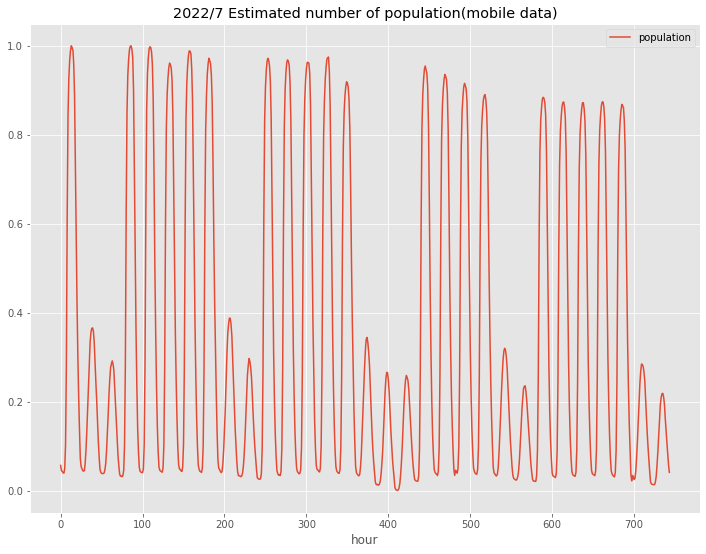

In [230]:
df_mobile.plot(title='2022/7 Estimated number of population(mobile data)',xlabel='hour')

<AxesSubplot:title={'center':'2022/7 Estimated number of tweets(ALL)'}, xlabel='hour'>

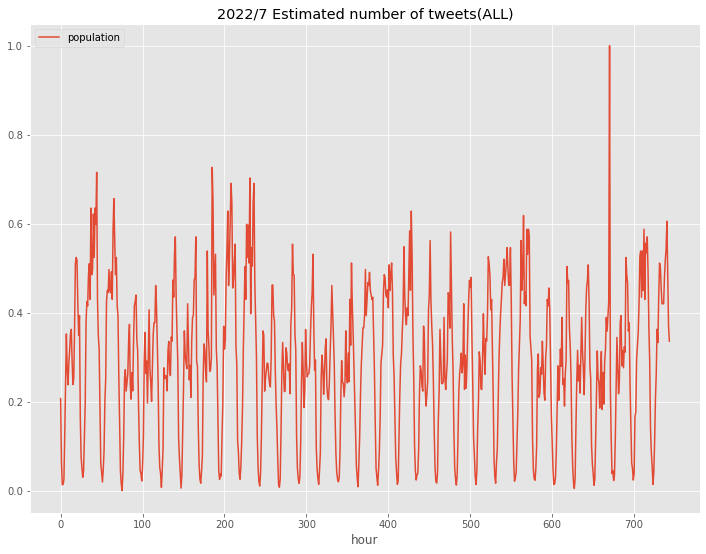

In [231]:
df_Geo.plot(title='2022/7 Estimated number of tweets(ALL)',xlabel='hour')

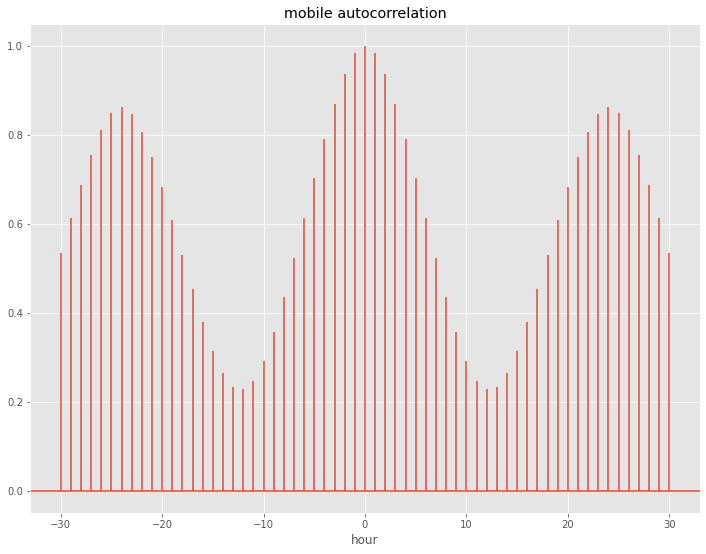

In [232]:
plt.acorr(df_mobile['population'], detrend=mlab.detrend_none, maxlags=30)
plt.xlabel('hour')
plt.title('mobile autocorrelation')
plt.show()

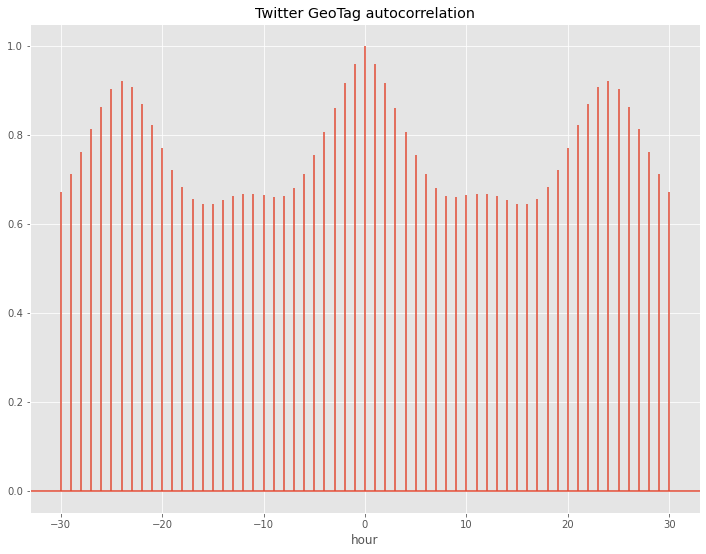

In [233]:
plt.acorr(df_Geo['population'], detrend=mlab.detrend_none, maxlags=30)
plt.xlabel('hour')
plt.title('Twitter GeoTag autocorrelation')
plt.show()

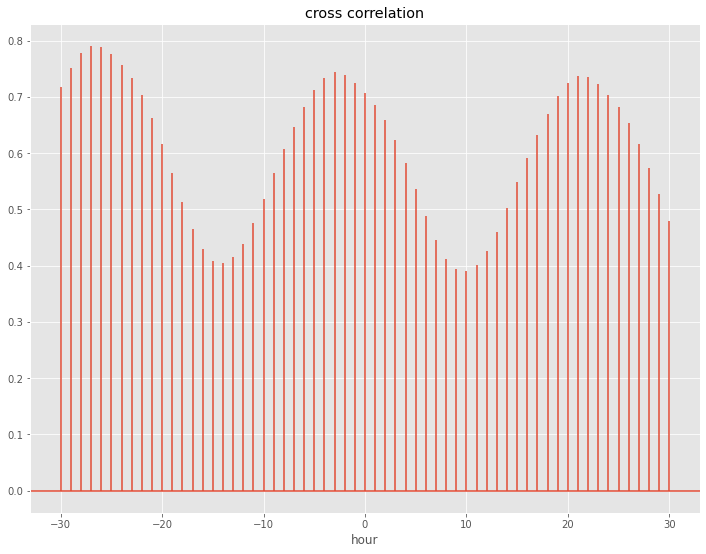

In [234]:
# 相互相関コレログラム（原系列）
plt.xcorr(df_mobile['population'], df_Geo['population'],detrend=mlab.detrend_none, maxlags=30)
plt.xlabel('hour')
plt.title('cross correlation')
plt.show()

,xcor
lag,
-30,0.716676
-29,0.751495
-28,0.777677
-27,0.790697
-26,0.788603
...,...
26,0.652847
27,0.616622
28,0.573632


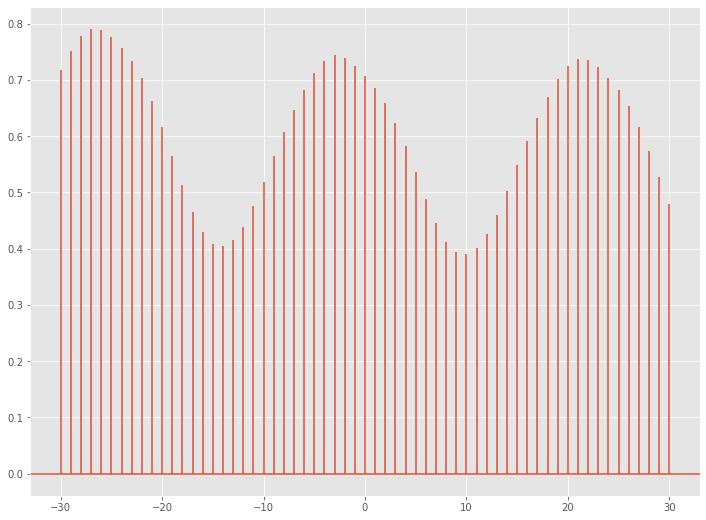

In [235]:
xcor_value = plt.xcorr(df_mobile['population'], df_Geo['population'],detrend=mlab.detrend_none, maxlags=30)
xcor_pd = pd.DataFrame(xcor_value[1],xcor_value[0])
xcor_pd.index.name = 'lag'
xcor_pd.columns = ['xcor']
xcor_pd #確認

In [236]:
xcor_pd.to_csv('tmp.csv')

In [237]:
df_mobile_ = df_mobile.rename(columns={'population': 'population_mobile'})

In [238]:
df_tmp = pd.concat([df_mobile_,df_Geo],axis=1)

<AxesSubplot:>

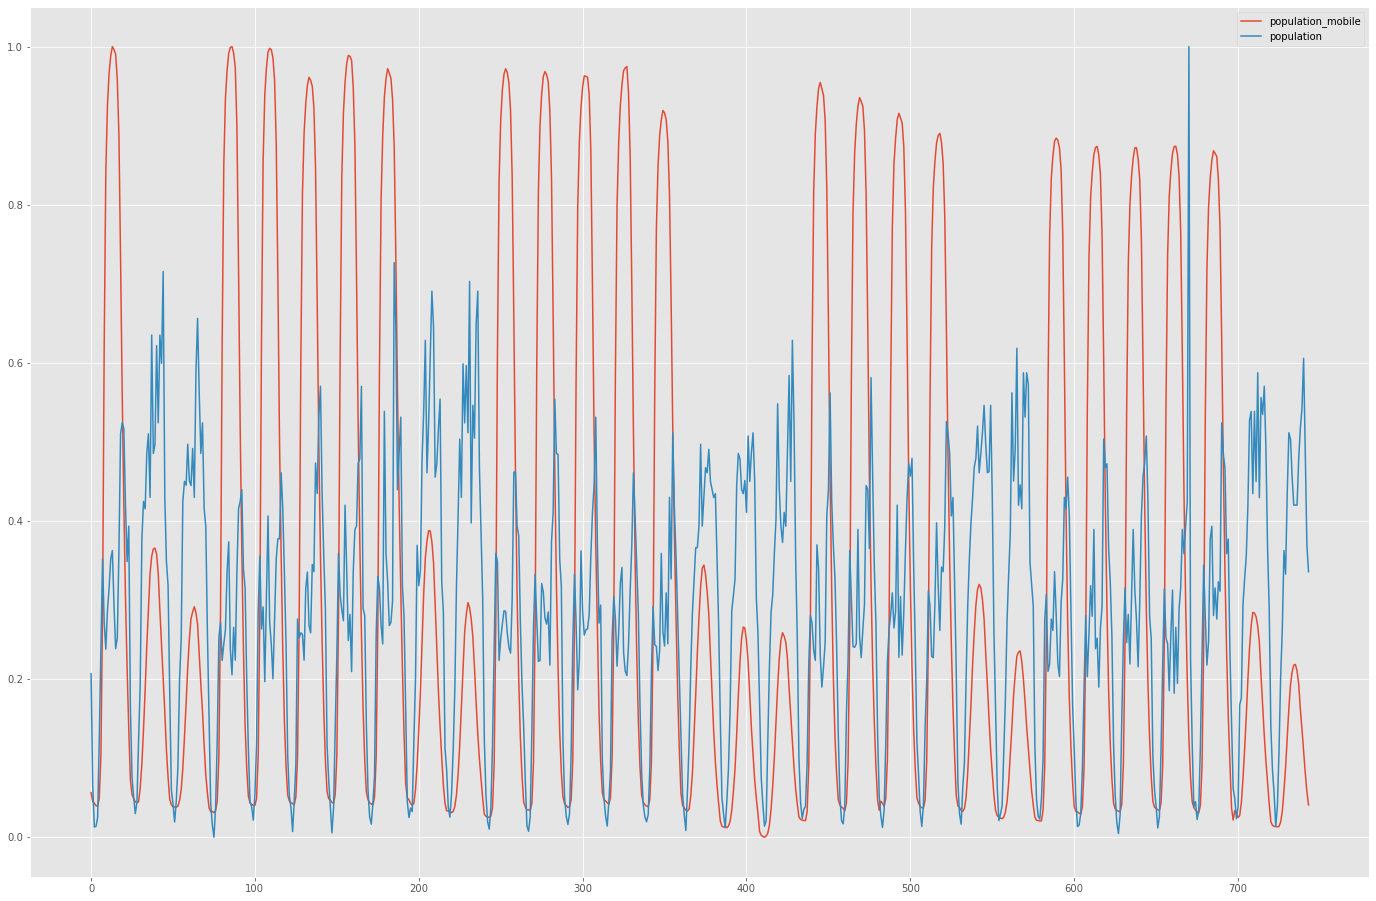

In [239]:
df_tmp.plot(figsize=(24, 16))

<AxesSubplot:>

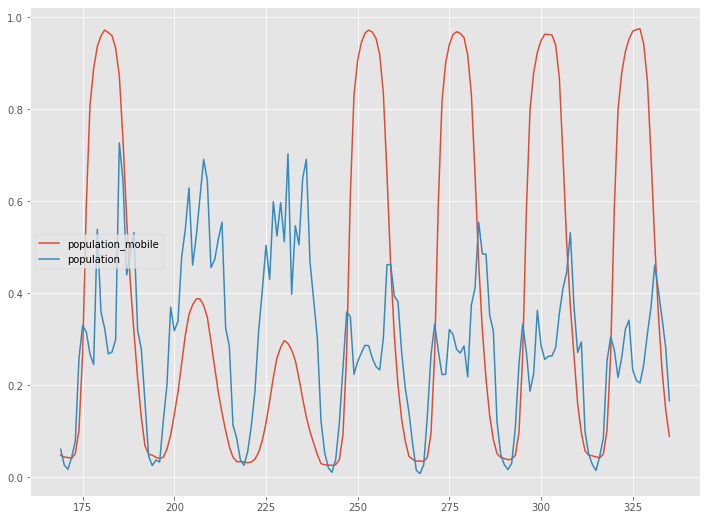

In [240]:
df_tmp[169:336].plot()

In [241]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    adf_df = pd.DataFrame(
        [
            adfuller(series)[1]
        ],
        columns=['P値']
    )
    adf_df['P値'] = adf_df['P値'].round(decimals=3).astype(str)
    print(adf_df)

# 原系列のp値を算出
adf_test(series=df_mobile['population'])

      P値
0  0.243
